In [1]:
from random import choice
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

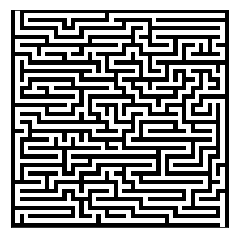

In [3]:
def mazegen(height=8, width=8):
    dims = (height*2 + 1, width*2 + 1)
    maze = np.ones(dims)
    cells = np.zeros((height, width))
    
    stack = []
    
    maze[(0,1)] = 0
    maze[(-1,-2)] = 0
    cells[(0,0)] = 1
    stack.append((0,0))
    
    while stack:
        x,y = stack.pop()
        
        neighbours = []
        if x>0 and cells[x-1,y] == 0:
            neighbours.append((x-1,y))
        if x<width-1 and cells[x+1,y] == 0:
            neighbours.append((x+1,y))
        if y>0 and cells[x,y-1] == 0:
            neighbours.append((x,y-1))
            neighbours.append((x,y-1))
            neighbours.append((x,y-1)) # horizontal bias
        if y<height-1 and cells[x,y+1] == 0:
            neighbours.append((x,y+1))
            neighbours.append((x,y+1))
            neighbours.append((x,y+1)) # horizontal bias

        if neighbours:
            stack.append((x,y))
            neighbour = choice(neighbours)
            
            nimgmap = (neighbour[0]*2+1, neighbour[1]*2+1)
            maze[nimgmap] = 0
            
            current = (x*2+1, y*2+1)
            maze[current] = 0
            
            wall = (neighbour[0]+x+1, neighbour[1]+y+1)
            maze[wall] = 0
            
            cells[neighbour] = 1
            stack.append(neighbour)
    
    return maze

m = mazegen(25, 25)
#print(m)
plt.imshow(m, cmap=plt.cm.binary, interpolation='nearest')
plt.xticks([]), plt.yticks([])
plt.show()